# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [77]:
# Install the required libraries
!pip install prophet

In [78]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

###

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

##

In [80]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', parse_dates=True).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [81]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [82]:
len(df_mercado_trends)

37106

In [83]:

df_mercado_trends.dtypes
df_mercado_trends.columns

Index(['Search Trends'], dtype='object')

In [84]:
# df_mercado_trends.describe()
df_mercado_trends.describe().T  ###...  describe data Transposed

,count,mean,std,min,25%,50%,75%,max
Search Trends,37106.0,48.128739,27.171429,0.0,24.0,51.0,68.0,125.0


#### **Mercado Trends Dataset** Mean and Median (50%) Searches are: **48.13** and **51.0** respectively

####

### **May 2020:** Searches/Traffic (mercado_may == total_traffic_may )

In [85]:
# Slice the DataFrame to just the month of May 2020
mercado_may = df_mercado_trends.loc["2020-05"]
mercado_may.head()
#mercado_may.tail()

,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


In [86]:
mercado_may.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2020-05-01 00:00:00 to 2020-05-31 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  744 non-null    int64
dtypes: int64(1)
memory usage: 11.6 KB


In [87]:
mercado_may.sum()

Search Trends    38181
dtype: int64

In [88]:
len(mercado_may)

744

In [89]:
mercado_may.describe().T

,count,mean,std,min,25%,50%,75%,max
Search Trends,744.0,51.318548,29.030673,6.0,22.75,54.0,74.0,125.0


#### **May 2020** Mean and Median (50%) Searches are: **51.32** and **54.0** respectively

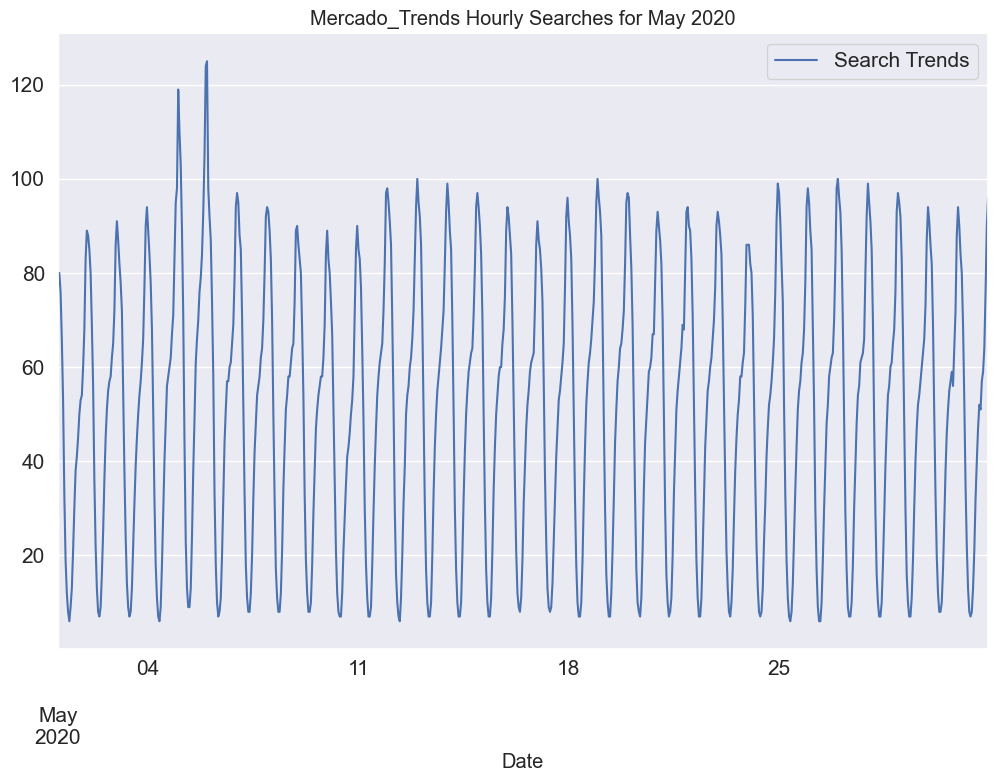

In [90]:
# Slice the DataFrame to just the month of May 2020
#df_mercado_trends["may"]

# Plot to visualize the data for May 2020
mercado_may.plot(title="Mercado_Trends Hourly Searches for May 2020", figsize = (12,8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()
# df_mercado_trends.

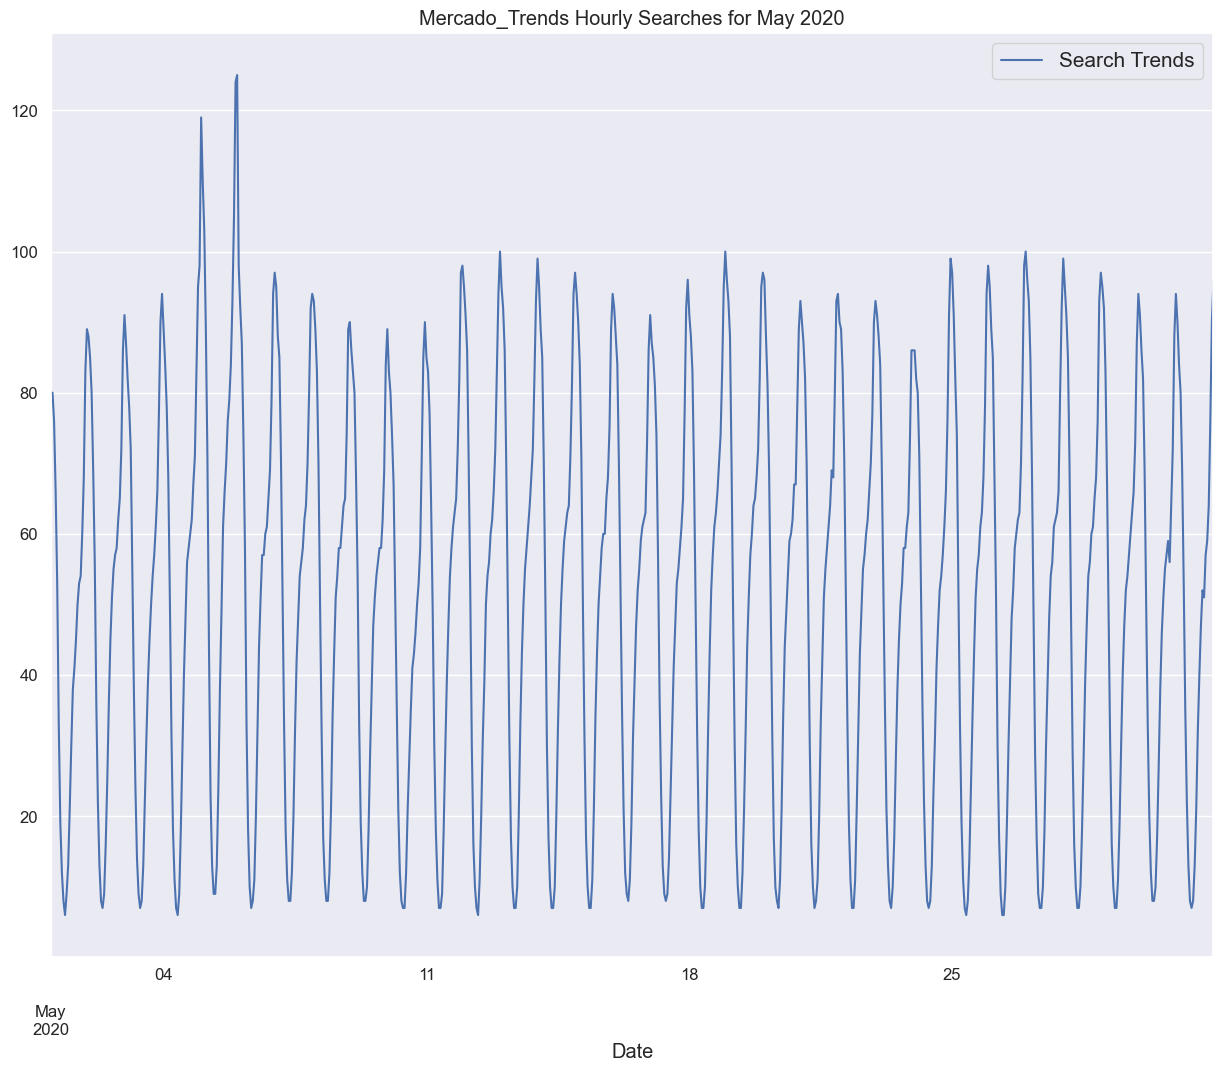

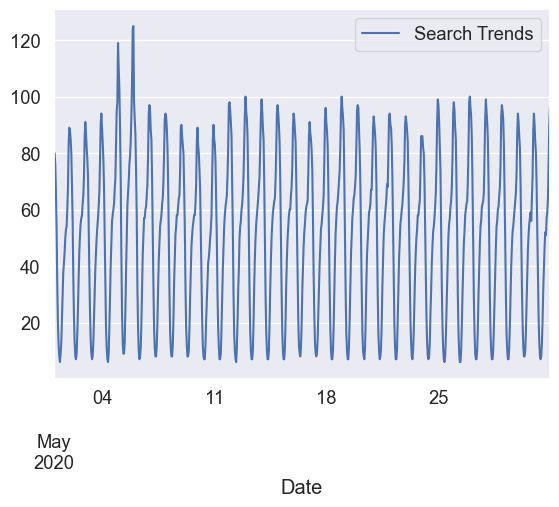

In [91]:
# Plot to visualize the data for May 2020
mercado_may.plot(title="Mercado_Trends Hourly Searches for May 2020", figsize = (15,12), fontsize = 12)
plt.legend(fontsize = 15)
#plt.style.use("fivethirtyeight")
mercado_may.plot(kind="line", legend=True);
# df_mercado_trends.

In [92]:
mercado_may.iloc[0,0]  ###... finding the first data in the search

80

In [93]:
###... normalizing searches >> dividing the subsequent searches by the search at index 0.
#mercado_may.div(df_mercado_trends.iloc[0,0]).head()

mercado_may.div(mercado_may.iloc[0,0]).head()

,Search Trends
Date,
2020-05-01 00:00:00,1.0000
2020-05-01 01:00:00,1.0000
2020-05-01 02:00:00,0.9500
2020-05-01 03:00:00,0.8250
2020-05-01 04:00:00,0.6625


In [94]:
###... comparing returns in percent (%) to the index 0 search ( [0]/[...])

mercado_may.div(mercado_may.iloc[0,0]).mul(100).head()

,Search Trends
Date,
2020-05-01 00:00:00,100.00
2020-05-01 01:00:00,100.00
2020-05-01 02:00:00,95.00
2020-05-01 03:00:00,82.50
2020-05-01 04:00:00,66.25


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [95]:
# Calculate the sum of the total search traffic for May 2020
total_traffic_may = mercado_may.sum()

# View the traffic_may_2020 value
total_traffic_may

Search Trends    38181
dtype: int64

### **May 2020:** Total Search Traffic for May 2020 = **38181** Searches

In [96]:
###... DownSampling from hourly to Monthly Searches
df_monthly_seaches = df_mercado_trends.resample("ME").sum() 
df_monthly_seaches.head()

,Search Trends
Date,
2016-06-30,33196
2016-07-31,33898
2016-08-31,34459
2016-09-30,32376
2016-10-31,32334


In [97]:
df_mth_searches = df_monthly_seaches.describe()
round(df_mth_searches,1).T

,count,mean,std,min,25%,50%,75%,max
Search Trends,52.0,34343.6,4352.8,8126.0,33734.2,35172.5,36066.5,39177.0


#### **Monthly** Mean and Median (50%) Searches are: **34343.6** and **35172.5** respectively

##

#### **Extra Calculations:**   Quarter ending, Year ending...

In [98]:
df_quarterly_seaches = df_mercado_trends.resample("QE").sum() 
df_quarterly_seaches.head()

,Search Trends
Date,
2016-06-30,33196
2016-09-30,100733
2016-12-31,99916
2017-03-31,100248
2017-06-30,99949


In [99]:
#df_quarterly_seaches.describe()
df_qrtly_searches = df_quarterly_seaches.describe()
round(df_qrtly_searches,2).T

,count,mean,std,min,25%,50%,75%,max
Search Trends,18.0,99214.72,18210.28,33196.0,100023.75,104750.5,107103.5,111317.0


#### **Quaterly** Mean and Median (50%) Searches are: **99,214.72** and **104,750.5** respectively

In [100]:
df_yearly_seaches = df_mercado_trends.resample("YE").sum() 
df_yearly_seaches#.head()

,Search Trends
Date,
2016-12-31,233845
2017-12-31,408397
2018-12-31,424639
2019-12-31,437720
2020-12-31,281264


In [101]:
df_yrly_searches = df_yearly_seaches.describe()
round(df_yrly_searches,2).T

,count,mean,std,min,25%,50%,75%,max
Search Trends,5.0,357173.0,93052.88,233845.0,281264.0,408397.0,424639.0,437720.0


#### **Yearly** Mean and Median (50%) Searches are: **357173.0** and **408397.0** respectively

##

## **Compare** May 2020 Traffic vs Monthly Media Traffic

In [102]:
# Compare the search traffic for the month of May 2020 to the overall monthly median value
###... traffic_may_2020/median_monthly_traffic
total_traffic_may
df_monthly_seaches.median()

df_median_search_comp = total_traffic_may / df_monthly_seaches.median()
df_median_search_comp

Search Trends    1.085536
dtype: float64

In [103]:
round((df_median_search_comp-1)*100,2)

Search Trends    8.55
dtype: float64

##### **Answer the following question:**

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Google search traffics increased during the Month when Mercadolibre released its financial results by **8.55%** as shown above

### **Index Year and Index Month Chain Value** of sum and Median functions: 35172.5 

In [104]:
combined_yr_mth_df = pd.concat([df_monthly_seaches, df_yearly_seaches], axis="columns",join="outer", ignore_index=True)
combined_yr_mth_df .reset_index(drop=True, inplace=True)
combined_yr_mth_df.nunique()

0    52
1     5
dtype: int64

### **Year and Month Combined Searches Analysis**

In [105]:
combined_yr_mth_df = pd.concat(
    [df_yearly_seaches.median(), df_monthly_seaches.median(), df_yearly_seaches, df_monthly_seaches,   ],
    axis="columns",join="outer", ignore_index=True)
combined_yr_mth_df .reset_index(drop=True, inplace=True)
combined_yr_mth_df.head(10)

,0,1,2,3
0,408397.0,35172.5,NaN,NaN
1,NaN,NaN,233845.0,33789.0
2,NaN,NaN,408397.0,35420.0
3,NaN,NaN,424639.0,35245.0
4,NaN,NaN,437720.0,37825.0
5,NaN,NaN,281264.0,NaN
6,NaN,NaN,NaN,33196.0
7,NaN,NaN,NaN,33898.0
8,NaN,NaN,NaN,34459.0
9,NaN,NaN,NaN,32376.0


In [106]:
combined_yr_mth_df.nunique()

0     1
1     1
2     5
3    52
dtype: int64

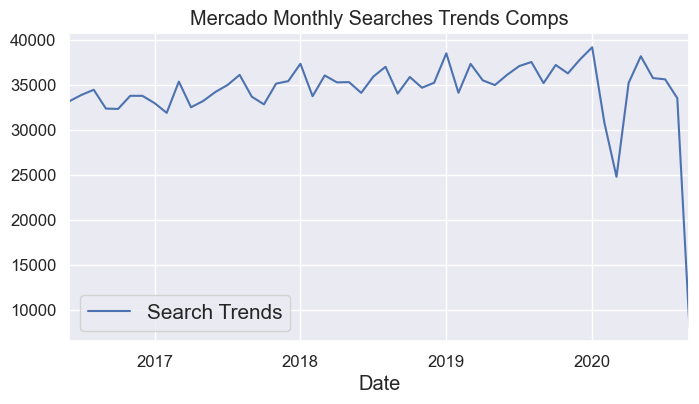

In [107]:
df_monthly_seaches.plot(title="Mercado Monthly Searches Trends Comps", figsize = (8,4), fontsize = 12)
plt.legend(fontsize = 15)
plt.show()

In [108]:
df_monthly_seaches.iloc[0,0]

33196

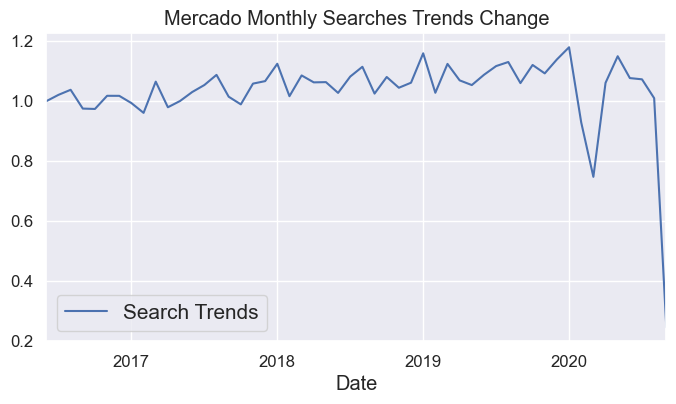

In [109]:
###...nromalized change comparism
df_monthly_search_change = df_monthly_seaches.div(df_monthly_seaches.iloc[0,0])#.mul(100)
df_monthly_search_change.plot(title="Mercado Monthly Searches Trends Change", figsize = (8,4), fontsize = 12)
plt.legend(fontsize = 15)
plt.show()

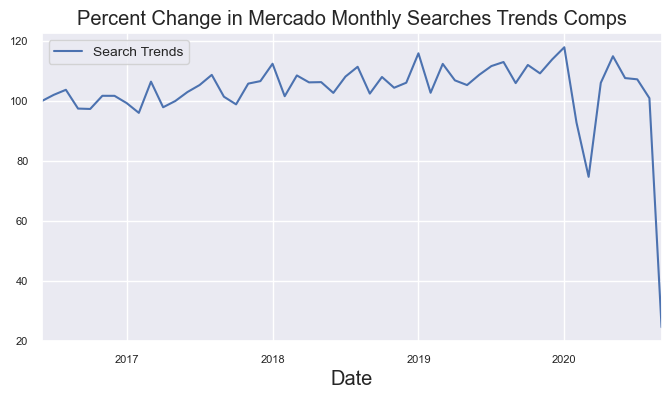

In [110]:
###...Percentage change comparism
df_monthly_search_pct_change = df_monthly_seaches.div(df_monthly_seaches.iloc[0,0]).mul(100)
#df_monthly_pct_change 

df_monthly_search_pct_change.plot(title="Percent Change in Mercado Monthly Searches Trends Comps", figsize = (8,4), fontsize = 8)
plt.legend(fontsize = 10)
plt.show()

### **Monthly Searches Declining:** The three graphs above revealed that the searches in Mercadolibre searches was declining towards the end of 2020

###

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

#### **Graph of df_mercado_trends.index.day**

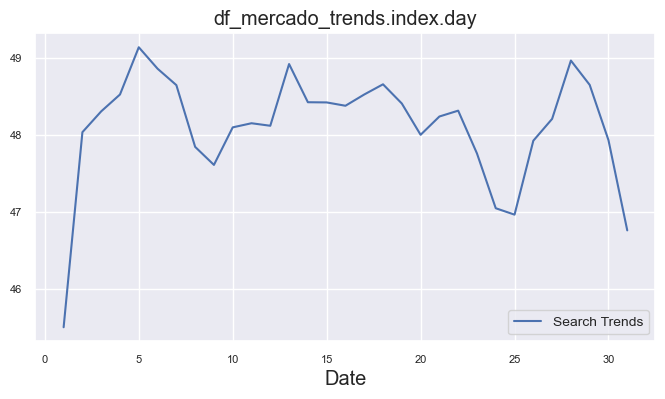

In [111]:
df_index_hr = df_mercado_trends.index.day
df_mercado_trends.groupby(by = [df_index_hr]).mean().plot(
    title="df_mercado_trends.index.day", figsize = (8,4), fontsize = 8)
plt.legend(fontsize = 10)
plt.show()
 #.sum().median() 


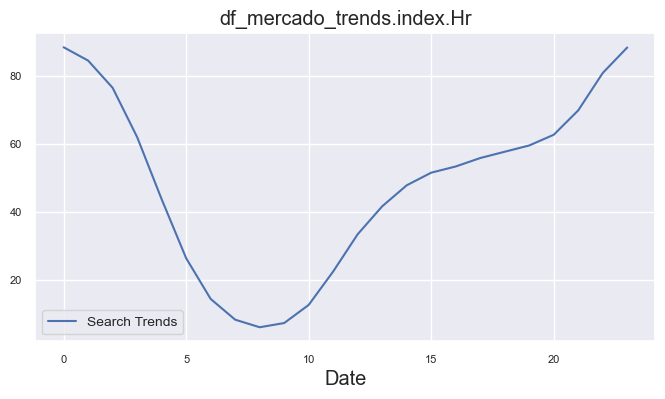

In [112]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

# df_index_yr = df_mercado_trends.index.year
# df_index_mth = df_mercado_trends.index.month
df_index_hr = df_mercado_trends.index.hour
#df_index_hr = df_mercado_trends.index.day

#df_mercado_trends.groupby(by = [df_index_hr]).Sum().plot() #.sum().median() 
df_mercado_trends.groupby(by = [df_index_hr]).mean().plot(
   title="df_mercado_trends.index.Hr", figsize = (8,4), fontsize = 8)
plt.legend(fontsize = 10)
plt.show()
#df_mercado_trends.groupby(by = [df_index_hr]).mean().plot() #.sum().median() 

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

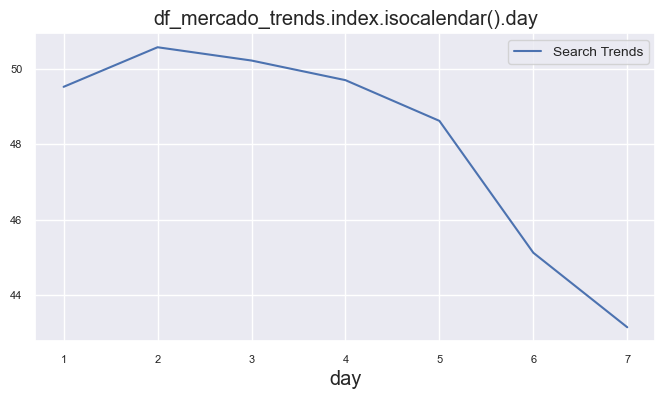

In [113]:
df_index_hr = df_mercado_trends.index.isocalendar().day

df_mercado_trends.groupby(by = [df_index_hr]).mean().plot(
    
    title="df_mercado_trends.index.isocalendar().day", figsize = (8,4), fontsize = 8)
plt.legend(fontsize = 10)
plt.show()
 #.sum().median() 

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

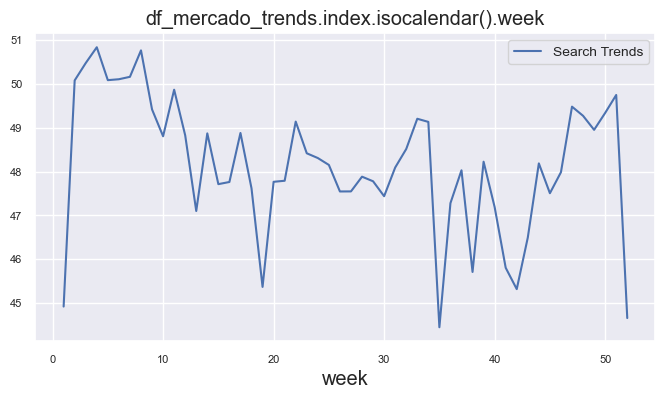

In [114]:
df_index_hr = df_mercado_trends.index.isocalendar().week
df_mercado_trends.groupby(by = [df_index_hr]).mean().plot(
     title="df_mercado_trends.index.isocalendar().week", figsize = (8,4), fontsize = 8)
plt.legend(fontsize = 10)
plt.show()


In [115]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**   Yes! There is time based-trend downward sloping from upper left ro lower right

####

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [116]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date", parse_dates=True ).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [117]:
len(df_mercado_stock)

9336

In [118]:
df_mercado_stock.columns

Index(['close'], dtype='object')

In [119]:
round(df_mercado_stock.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
close,9336.0,329.74,212.91,84.33,147.96,283.64,480.48,1123.17


#### **Mercado Stock** Mean and Median(50%) Stock Price are: **329.74** and **283.64** respectively

In [120]:
df_mercado_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9336 entries, 2015-01-02 09:00:00 to 2020-07-31 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   9336 non-null   float64
dtypes: float64(1)
memory usage: 145.9 KB


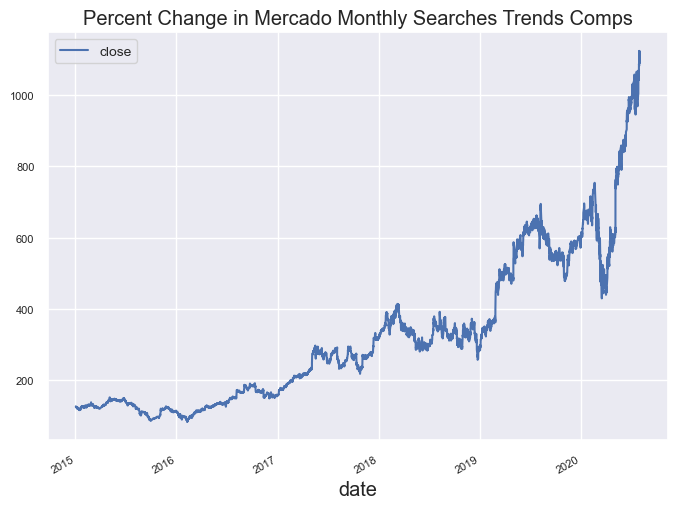

In [121]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot(
    title="Percent Change in Mercado Monthly Searches Trends Comps",
    figsize = (8,6), 
    fontsize = 8
    )
plt.legend(fontsize = 10)
plt.show()

In [122]:
display(len(df_mercado_stock))
display(len(df_mercado_trends))

9336

37106

In [123]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
# View the first and last five rows of the DataFrame

df_mercado_stock_trends = pd.concat([df_mercado_stock, df_mercado_trends], axis="columns",join="inner", ignore_index=False)
df_mercado_stock_trends.reset_index(drop=False, inplace=False)
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail()) 

,close,Search Trends
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


In [124]:
# ## Renaming the Columns
# df_mercado_stock_trends = df_mercado_stock_trends.rename(columns={'close': "Close Price"})
# df_mercado_stock_trends

##### 

#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [125]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
# View the first and last five rows of first_half_2020 DataFrame

# Slice the DataFrame to just the month of May 2020
df_mercado_stock_trends_1st_half_2020 = df_mercado_stock_trends.loc["2020-01":"2020-06"]
display(df_mercado_stock_trends_1st_half_2020.head())
display(df_mercado_stock_trends_1st_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


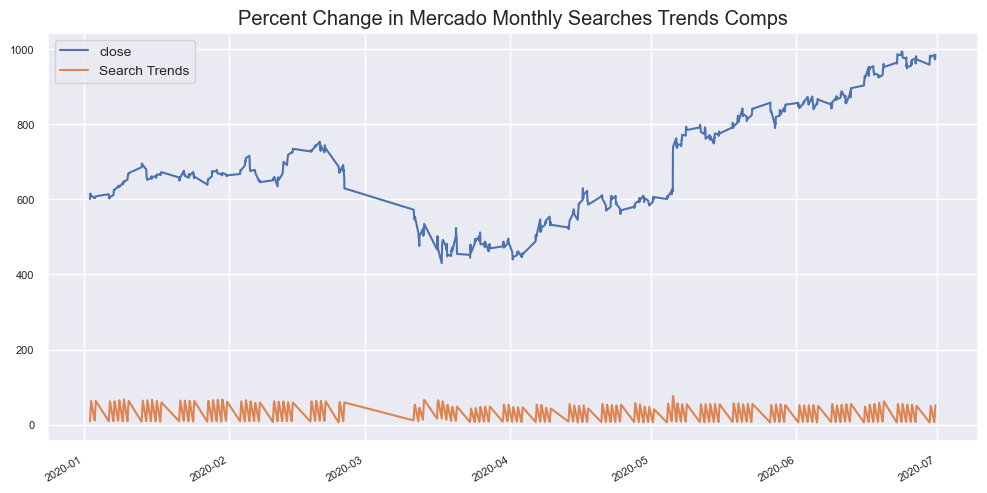

In [126]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax

df_mercado_stock_trends_1st_half_2020.plot(
    title="Percent Change in Mercado Monthly Searches Trends Comps",
    figsize = (12,6), 
    fontsize = 8
    )
plt.legend(fontsize = 10)
plt.show()

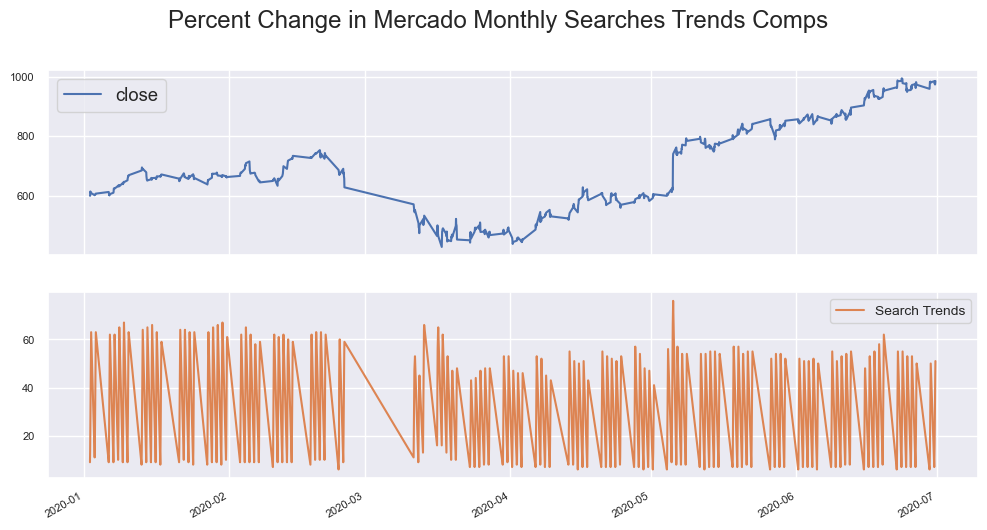

In [127]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_mercado_stock_trends_1st_half_2020.plot(
    title="Percent Change in Mercado Monthly Searches Trends Comps",
    figsize = (12,6), 
    fontsize = 8,
    subplots=True
    )
plt.legend(fontsize = 10)
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**   Yes! The time series charts above indicates a correlation between search trends and stock price moves. 

#####

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [128]:
df_mercado_stock_trends.head()

,close,Search Trends
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


In [129]:

# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado_stock_trends["Lagged Search Trends"] = df_mercado_stock_trends['Search Trends'].shift(periods = 1)

In [130]:
df_mercado_stock_trends.head(5)

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6,NaN
2016-06-01 10:00:00,136.63,12,6.0
2016-06-01 11:00:00,136.56,22,12.0
2016-06-01 12:00:00,136.42,33,22.0
2016-06-01 13:00:00,136.10,40,33.0


####

### **Stock Analysis:** Starts Here

In [131]:
df_mercado_stock_trends["Stock_Volatility"] = df_mercado_stock_trends["close"].pct_change().rolling(window=4).std()

In [132]:
df_mercado_stock_trends

,close,Search Trends,Lagged Search Trends,Stock_Volatility
2016-06-01 09:00:00,135.160,6,NaN,NaN
2016-06-01 10:00:00,136.630,12,6.0,NaN
2016-06-01 11:00:00,136.560,22,12.0,NaN
2016-06-01 12:00:00,136.420,33,22.0,NaN
2016-06-01 13:00:00,136.100,40,33.0,0.006134
...,...,...,...,...
2020-07-31 11:00:00,1105.780,20,11.0,0.012837
2020-07-31 12:00:00,1087.925,32,20.0,0.013549
2020-07-31 13:00:00,1095.800,41,32.0,0.013295
2020-07-31 14:00:00,1110.650,47,41.0,0.013001


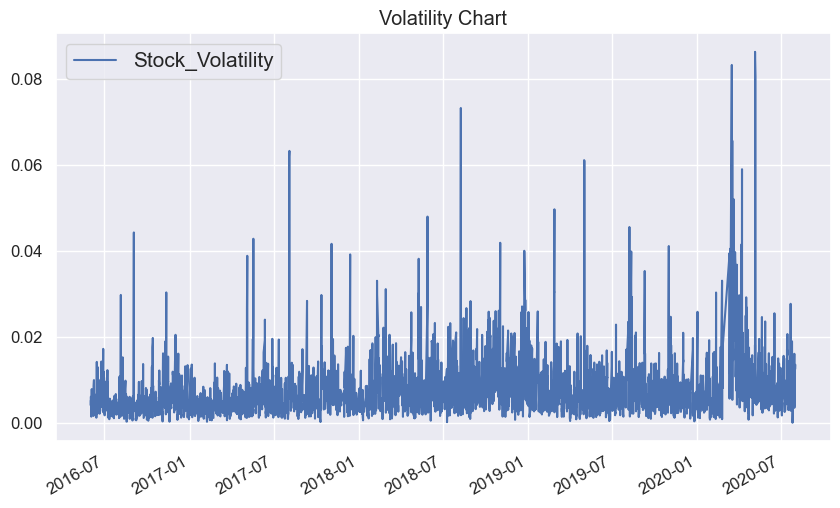

In [133]:
df_mercado_stock_trends['Stock_Volatility'].plot(title="Volatility Chart", figsize = (10,6), fontsize = 12)
plt.legend(fontsize = 15)


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [134]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_stock_trends["hourly_stock_returns"] = df_mercado_stock_trends["close"].pct_change()

# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail())


,close,Search Trends,Lagged Search Trends,Stock_Volatility,hourly_stock_returns
2016-06-01 09:00:00,135.16,6,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock_Volatility,hourly_stock_returns
2020-07-31 11:00:00,1105.780,20,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53,47.0,0.013566,0.010678


#####

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [135]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_stock_trends[["Stock_Volatility","Lagged Search Trends", "hourly_stock_returns"]].corr()

,Stock_Volatility,Lagged Search Trends,hourly_stock_returns
Stock_Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
hourly_stock_returns,0.061424,0.017929,1.000000


In [136]:
df_mercado_stock_trends = df_mercado_stock_trends[["Stock_Volatility","Lagged Search Trends", "hourly_stock_returns"]].corr()

# Define a function to apply colors based on values
def color_negative_red(val):
    color = 'red' if val < 0.0000 else 'lime'
    return 'color: %s' % color

# Display the DataFrame with color-coded cells
df_mercado_stock_trends_styled = df_mercado_stock_trends.style.map(color_negative_red)
df_mercado_stock_trends_styled

,Stock_Volatility,Lagged Search Trends,hourly_stock_returns
Stock_Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
hourly_stock_returns,0.061424,0.017929,1.000000


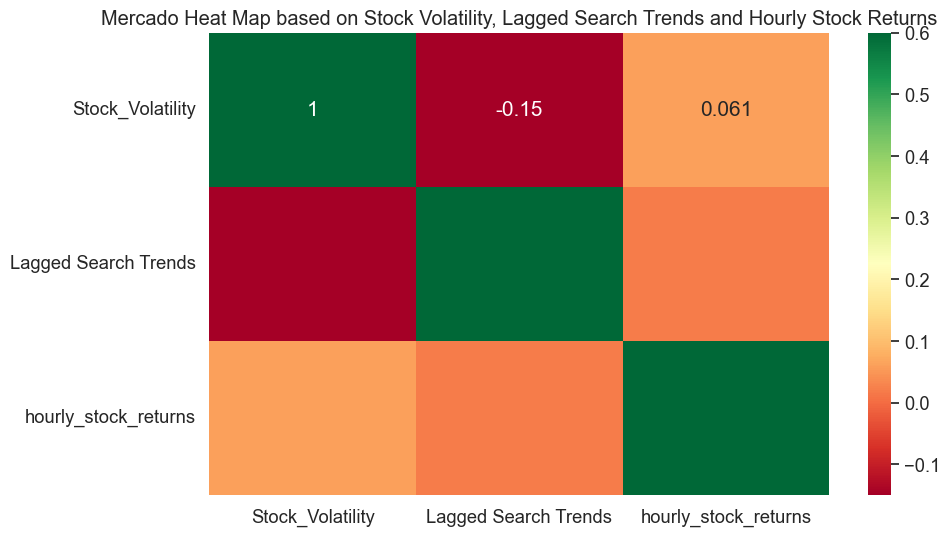

In [137]:
# Heat Map for MercadoLibre Stock Trends  
plt.figure(figsize = (10, 6))
plt.title("Mercado Heat Map based on Stock Volatility, Lagged Search Trends and Hourly Stock Returns")
sns.set(font_scale = 1.2)
sns.heatmap(df_mercado_stock_trends, cmap="RdYlGn", annot=True, annot_kws={"size": 15}, vmax=0.60)
plt.show()

##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** According the correlations caluclautions and the graph, there seesm to be **No Correlation** between Lagged Search traffic and Stock Volatility nor between lagged search traffic and hourly stock price returns

#####

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [138]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

prophet_df = df_mercado_trends.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df
prophet_df = prophet_df.rename(columns={"Date":'ds', "Search Trends": 'y'})

# Drop an NaN values from the prophet_df DataFrame
prophet_df.dropna(inplace=True)

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [139]:
# Call the Prophet function, store as an object
model = Prophet()
#model

In [140]:
# Fit the time-series model.
#model = Prophet()
# fit the model
model.fit(prophet_df)

22:34:44 - cmdstanpy - INFO - Chain [1] start processing
22:34:57 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
forecast = model.predict()
#predict_select = predict[[ 'yhat','yhat_lower', 'yhat_upper']]

In [142]:
 #Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

forecast = model.make_future_dataframe(periods=2000, freq = 'h')

# View the last five rows of the future_mercado_trends DataFrame
forecast.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [143]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
forecast = model.make_future_dataframe(periods=2000, freq = 'h')

predict = model.predict(forecast) 
#predict = model.predict() 
# View the first five rows of the future_mercado_trends DataFrame
#forecast
predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.366711,97.635661,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,77.826738,94.778222,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.181529,83.704551,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,51.448687,69.022840,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.426864,51.833968,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


###

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

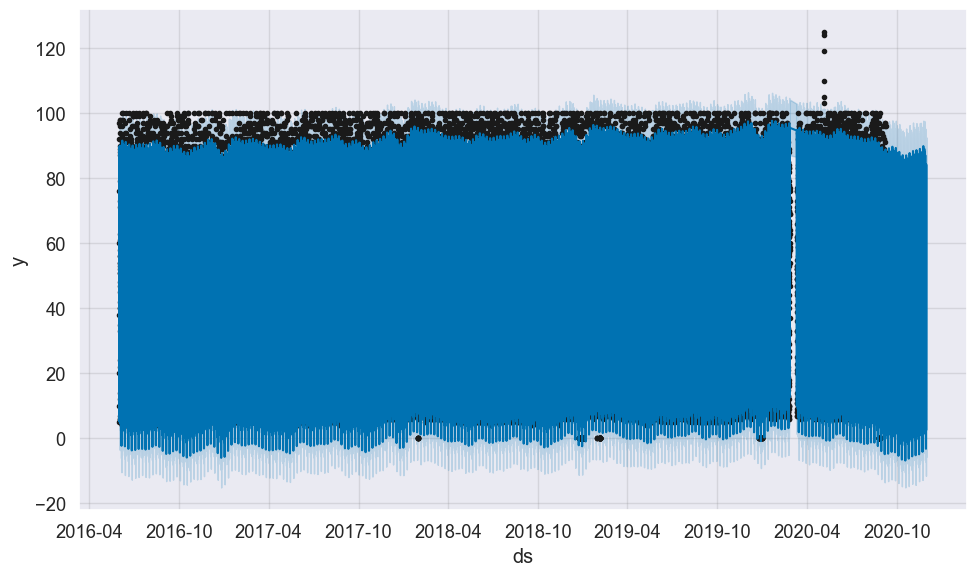

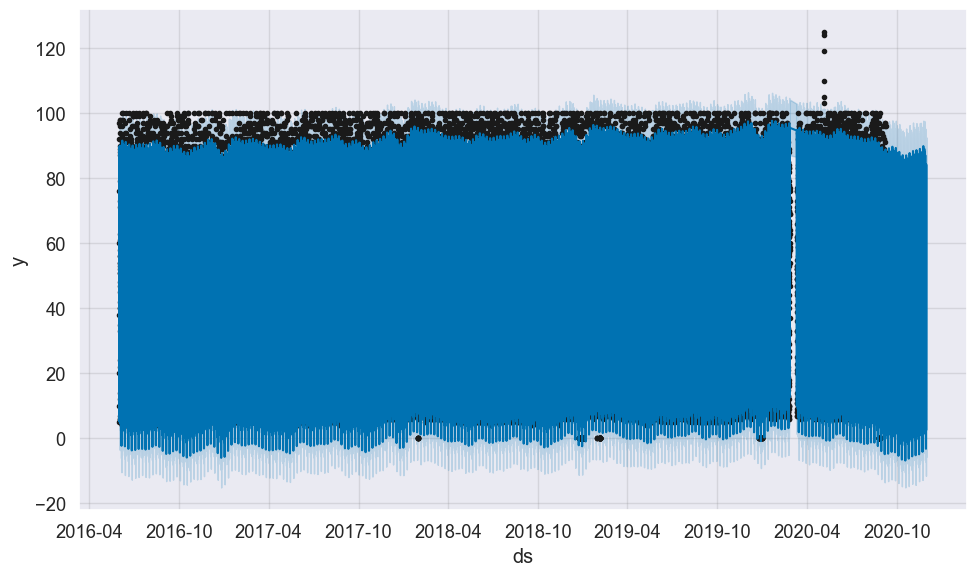

In [144]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(predict)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Near term forecast for the popularity of MercaadoLibre stock seems to be a declining trend in stock price based on the chart, from October 2020.


##

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [145]:
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
predict_select = predict[[ 'yhat','yhat_lower', 'yhat_upper']]
predict_select.head() 

,yhat,yhat_lower,yhat_upper
0,89.659992,81.366711,97.635661
1,86.106654,77.826738,94.778222
2,75.784037,67.181529,83.704551
3,60.517701,51.448687,69.022840
4,43.403713,34.426864,51.833968


**Solutions Note:** `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

Text(0.5, 1.0, 'Last 2000 Hrs of Predicted MercadoLibre Stock Price')

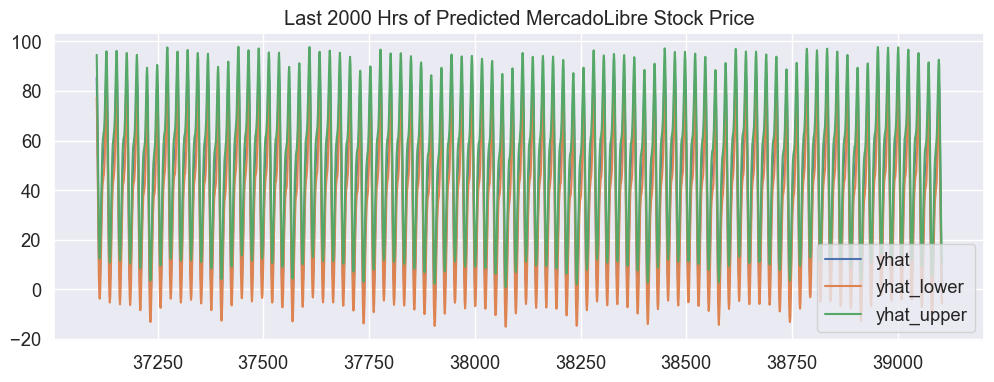

In [146]:
# predict_select[['yhat','yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot()
predict_select[['yhat','yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot(figsize=(12, 4)),
plt.title('Last 2000 Hrs of Predicted MercadoLibre Stock Price')

In [147]:
# Reset the index in the forecast_mercado_trends DataFrame

predict_select = predict_select.reset_index()
# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
print(predict_select)

       index       yhat  yhat_lower  yhat_upper
0          0  89.659992   81.366711   97.635661
1          1  86.106654   77.826738   94.778222
2          2  75.784037   67.181529   83.704551
3          3  60.517701   51.448687   69.022840
4          4  43.403713   34.426864   51.833968
...      ...        ...         ...         ...
39101  39101  39.507473   31.198303   47.928087
39102  39102  24.036286   15.612345   32.139346
39103  39103  12.070566    3.722632   20.524398
39104  39104   4.798365   -3.751899   13.319758
39105  39105   2.603438   -5.670727   10.540477

[39106 rows x 4 columns]


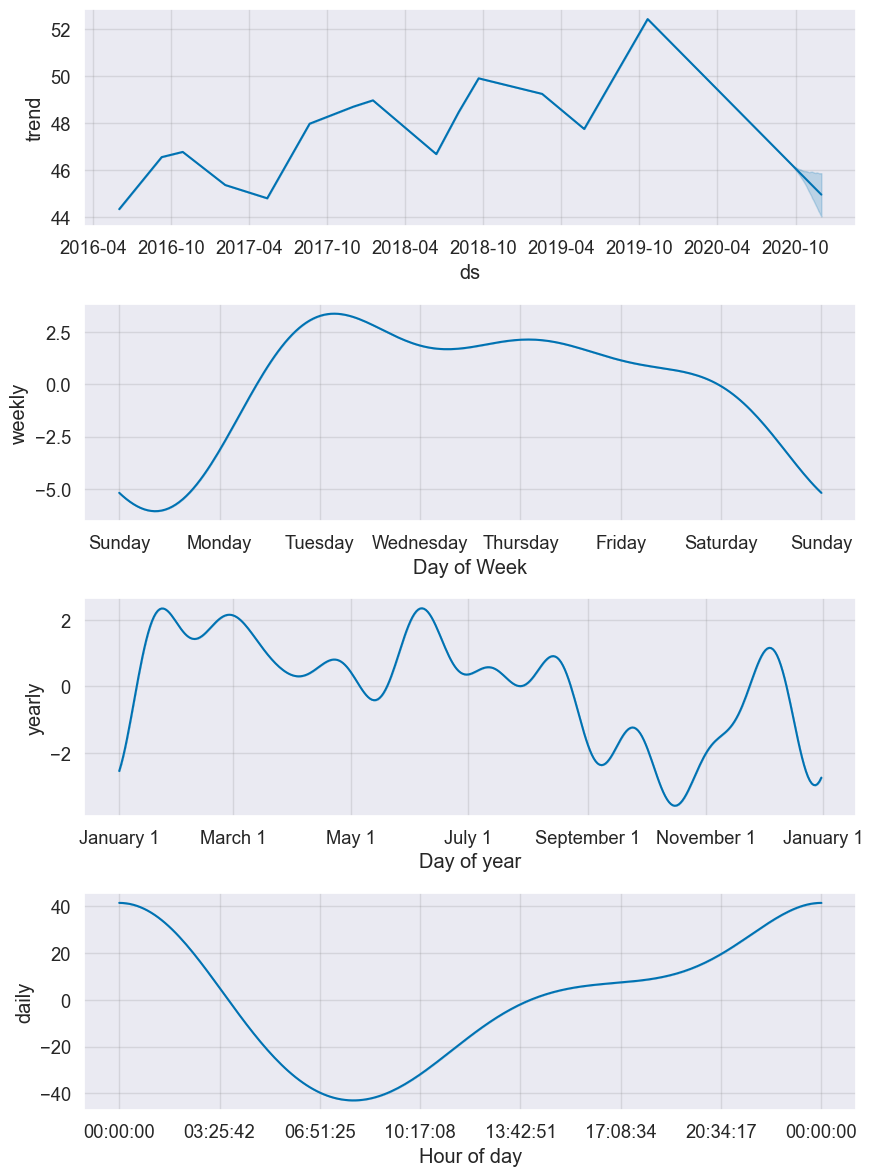

In [148]:
# Visualize the components using plot_components function
pred_select  = model.plot_components(predict)

### **Answer the following questions:**

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The hour of day with thegreatest popularity is around **midnight**

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesdays gets most search than any other day of the week, according to the **Day oi week** graph.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** Month of Novermber seems to have the lowest point for search in the calendar year.
